In [1]:
import pandas as pd
import geopandas as gpd

# === File Paths ===
csv_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km.csv"
geojson_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km.geojson"
named_csv_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km_with_name_subdistrict.csv"

In [2]:
def summarize_coverage(df, file_label):
    if 'combined_coverage_status' not in df.columns:
        print(f"❌ 'combined_coverage_status' column missing in {file_label}")
        return
    status = df['combined_coverage_status'].str.strip().str.lower()
    total = len(status)
    covered = (status == 'covered').sum()
    uncovered = (status == 'uncovered').sum()
    print(f"📂 {file_label}")
    print(f"Total villages: {total:,}")
    print(f"✅ Covered: {covered:,} ({covered/total:.2%})")
    print(f"❌ Uncovered: {uncovered:,} ({uncovered/total:.2%})\n")


In [3]:
df_csv = pd.read_csv(csv_path)
summarize_coverage(df_csv, "CSV File")
gdf_geojson = gpd.read_file(geojson_path)
summarize_coverage(gdf_geojson, "GeoJSON File")
df_named_csv = pd.read_csv(named_csv_path)
summarize_coverage(df_named_csv, "Named CSV with Subdistrict Info")

📂 CSV File
Total villages: 51,404
✅ Covered: 43,898 (85.40%)
❌ Uncovered: 7,506 (14.60%)

📂 GeoJSON File
Total villages: 51,404
✅ Covered: 43,898 (85.40%)
❌ Uncovered: 7,506 (14.60%)

📂 Named CSV with Subdistrict Info
Total villages: 51,404
✅ Covered: 43,898 (85.40%)
❌ Uncovered: 7,506 (14.60%)



In [5]:
import pandas as pd
import os

# Define input path
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km_with_name_subdistrict.csv"

# Output directory
output_dir = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables"
os.makedirs(output_dir, exist_ok=True)

# Load the CSV
df = pd.read_csv(input_path)

# Normalize coverage column
df['combined_coverage_status'] = df['combined_coverage_status'].str.lower().str.strip()
df.head()

,village_id,district,tru_2011,nearest_facility_dist_m,combined_coverage_status,geometry,name,subdistrict
0,404451,anugul,Rural,516.877028,covered,POINT (84.733026 21.101113),Nunamati,Chhendipada
1,404435,anugul,Rural,1602.189304,covered,POINT (84.832353 21.114561),Purunagarh,Chhendipada
2,404437,anugul,Rural,1221.953318,covered,POINT (84.813745 21.115977),Bamanali,Chhendipada
3,404421,anugul,Rural,3679.221148,uncovered,POINT (84.935516 21.111586),Kankarapal,Chhendipada
4,403775,anugul,Rural,1708.362070,covered,POINT (85.081005 21.104465),Chintamanipur,Kaniha


In [6]:
pie_df = df['combined_coverage_status'].value_counts().rename_axis('coverage_status').reset_index(name='village_count')
pie_path = os.path.join(output_dir, 'pie_chart_table.csv')
pie_df.to_csv(pie_path, index=False)
print(f"✅ Pie chart table saved at: {pie_path}")

✅ Pie chart table saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\pie_chart_table.csv


In [7]:
stacked_df = df.groupby(['district', 'combined_coverage_status']).size().unstack(fill_value=0).reset_index()
stacked_bar_path = os.path.join(output_dir, 'stacked_bar_table.csv')
stacked_df.to_csv(stacked_bar_path, index=False)
print(f"✅ Stacked bar chart table saved at: {stacked_bar_path}")

✅ Stacked bar chart table saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\stacked_bar_table.csv


In [8]:
bubble_df = df[df['combined_coverage_status'] == 'uncovered']
bubble_df = bubble_df.groupby(['district', 'subdistrict']).size().reset_index(name='uncovered_villages')
bubble_path = os.path.join(output_dir, 'bubble_chart_table.csv')
bubble_df.to_csv(bubble_path, index=False)
print(f"✅ Bubble chart table saved at: {bubble_path}")

✅ Bubble chart table saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\bubble_chart_table.csv


In [9]:
bar_df = df[df['combined_coverage_status'] == 'uncovered'].groupby('district').size().reset_index(name='uncovered_villages')
bar_df = bar_df.sort_values(by='uncovered_villages', ascending=False).head(10)
bar_path = os.path.join(output_dir, 'bar_chart_table.csv')
bar_df.to_csv(bar_path, index=False)
print(f"✅ Bar chart table saved at: {bar_path}")

✅ Bar chart table saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\bar_chart_table.csv


In [10]:
import pandas as pd
import os

# === 1. File Path ===
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km_with_name_subdistrict.csv"
output_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\district_uncovered_color.csv"

# === 2. Load data ===
df = pd.read_csv(input_path)
df['combined_coverage_status'] = df['combined_coverage_status'].str.lower().str.strip()

# === 3. Compute uncovered & total villages per district ===
summary_df = df.groupby('district')['combined_coverage_status'].value_counts().unstack(fill_value=0).reset_index()
summary_df.columns.name = None

summary_df['total_villages'] = summary_df['covered'] + summary_df['uncovered']
summary_df['uncovered_percent'] = round((summary_df['uncovered'] / summary_df['total_villages']) * 100, 2)

# === 4. Assign severity colors ===
def assign_color(p):
    if p >= 30:
        return 'darkred'
    elif p >= 20:
        return 'orangered'
    elif p >= 10:
        return 'orange'
    elif p >= 5:
        return 'gold'
    else:
        return 'green'

summary_df['color'] = summary_df['uncovered_percent'].apply(assign_color)

# === 5. Final formatting ===
final_df = summary_df[['district', 'uncovered', 'total_villages', 'uncovered_percent', 'color']]
final_df.columns = ['district', 'uncovered_villages', 'total_villages', 'uncovered_percent', 'color']

# === 6. Save to CSV ===
os.makedirs(os.path.dirname(output_path), exist_ok=True)
final_df.to_csv(output_path, index=False)

print(f"✅ File saved at: {output_path}")

✅ File saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish_ready_tables\district_uncovered_color.csv


In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import Point
import os

# === File Paths ===
uncovered_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.geojson"
districts_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
output_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\mhu_clusters_map.png"

os.makedirs(os.path.dirname(output_path), exist_ok=True)

In [12]:
# Load village and district boundaries
uncovered_gdf = gpd.read_file(uncovered_path).to_crs(epsg=3857)
districts_gdf = gpd.read_file(districts_path).to_crs(epsg=3857)

# Extract coordinates for clustering
coords = uncovered_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()
X = [[x, y] for x, y in coords]

In [14]:
# Run DBSCAN clustering (adjust eps as needed)
db = DBSCAN(eps=15000, min_samples=10).fit(X)
uncovered_gdf['cluster'] = db.labels_

# Filter out noise (-1) and get centroids
clustered_gdf = uncovered_gdf[uncovered_gdf['cluster'] != -1]
centroids = clustered_gdf.dissolve(by='cluster').centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=uncovered_gdf.crs)

C:\Users\utkar\AppData\Local\Temp\ipykernel_139144\1255490875.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\utkar\AppData\Local\Temp\ipykernel_139144\1255490875.py:20: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=320)
c:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


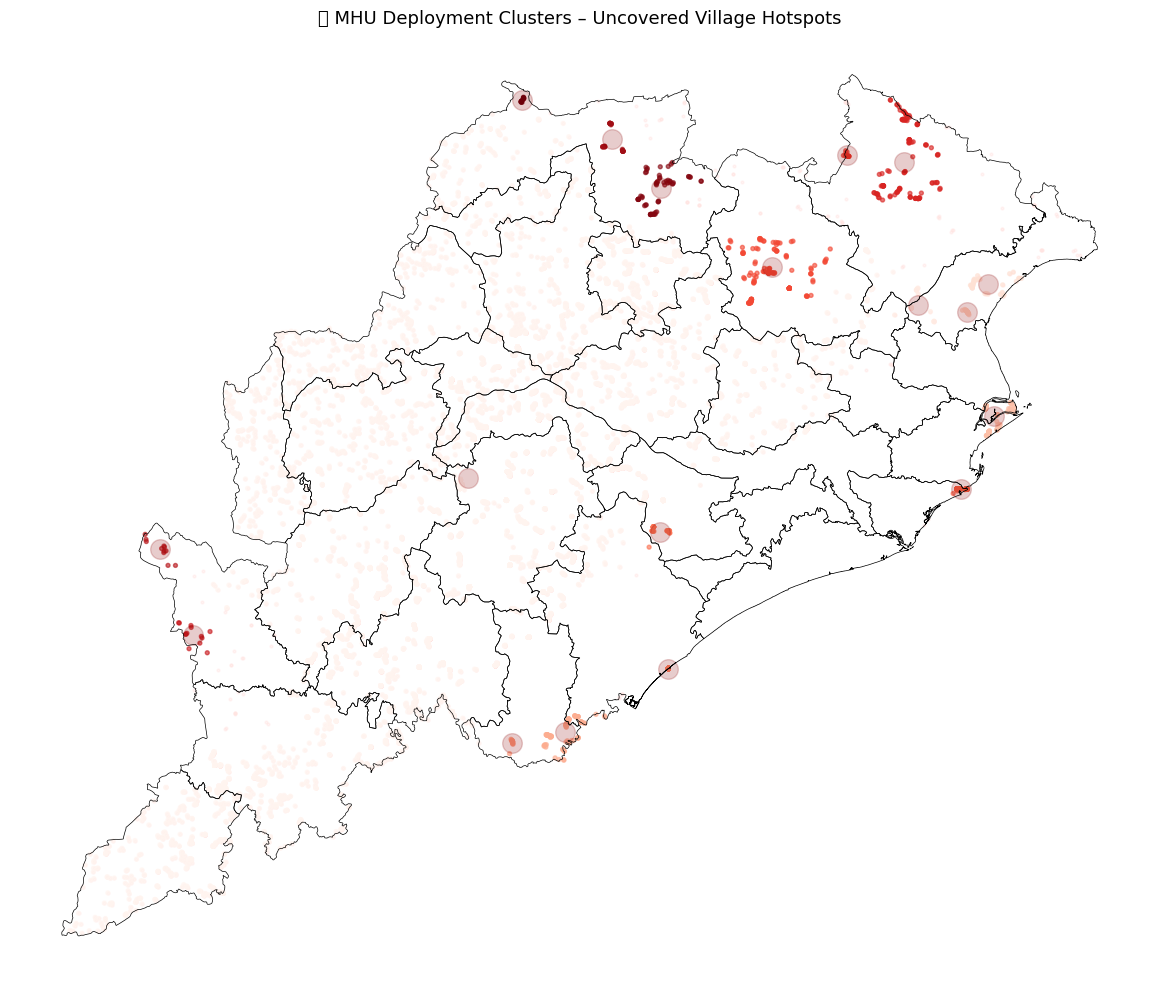

✅ Map saved at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\mhu_clusters_map.png


In [15]:
# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# District outlines
districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Uncovered points (light)
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=4, alpha=0.4)

# Clustered uncovered (red)
clustered_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=8, alpha=0.6)

# Centroid circles
centroid_gdf.plot(ax=ax, color='darkred', markersize=200, alpha=0.2, marker='o')

# Title & style
ax.set_title("📍 MHU Deployment Clusters – Uncovered Village Hotspots", fontsize=13)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_path, dpi=320)
plt.show()

print(f"✅ Map saved at: {output_path}")

C:\Users\utkar\AppData\Local\Temp\ipykernel_139144\1720833433.py:35: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\utkar\AppData\Local\Temp\ipykernel_139144\1720833433.py:36: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=320)
c:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


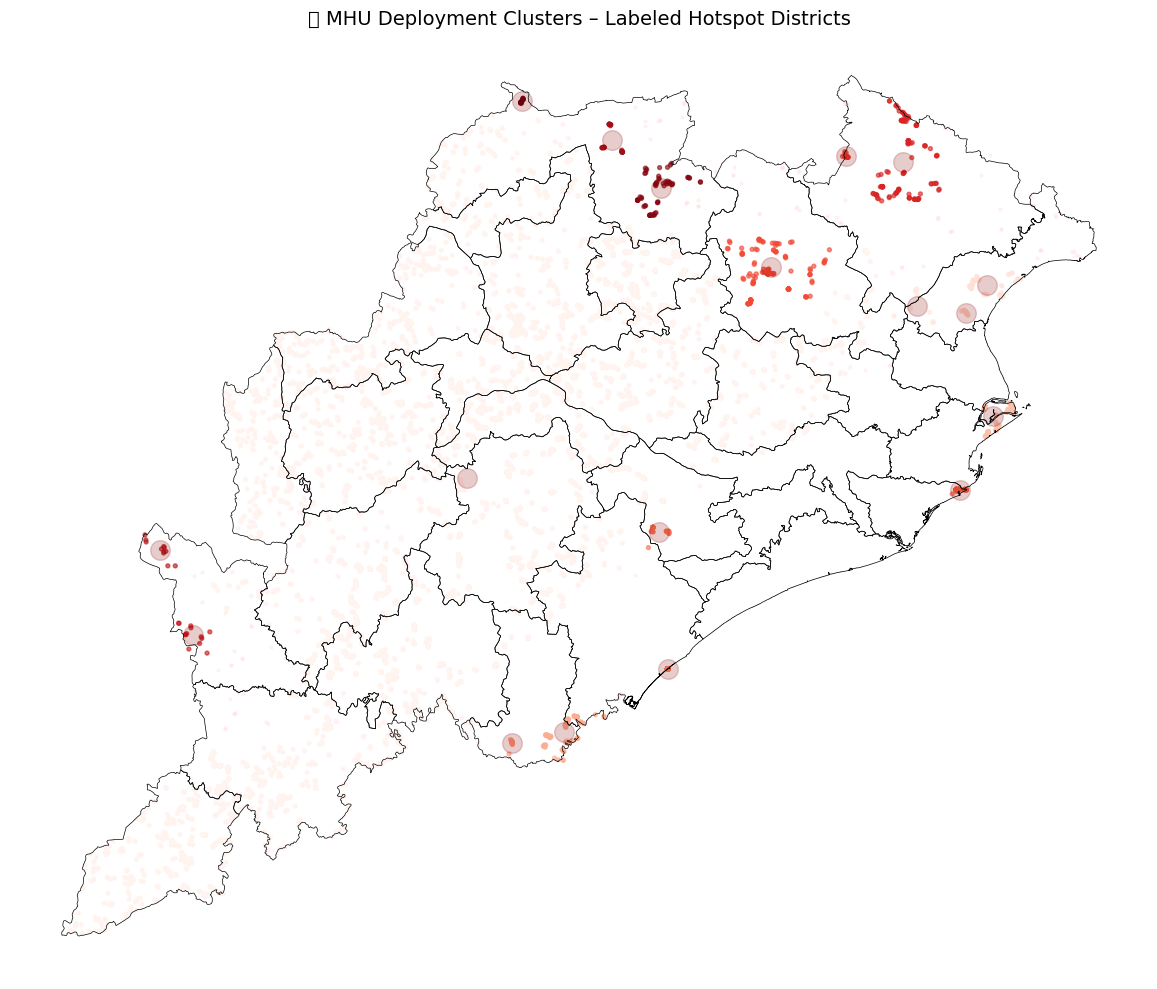

✅ Cluster map with district labels saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\mhu_clusters_map.png


In [16]:
# === Enhanced Plot: District Labels for Cluster Hotspots ===

import matplotlib.pyplot as plt

# Filter districts that contain clustered uncovered points
hot_districts = clustered_gdf['district'].unique()
district_labels = districts_gdf[districts_gdf['district'].isin(hot_districts)].copy()

# Get centroids for labeling
district_labels['centroid'] = district_labels.geometry.centroid

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# District outlines
districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# All uncovered villages (background)
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=4, alpha=0.4)

# Clustered uncovered villages
clustered_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=8, alpha=0.6)

# Overlay transparent hotspot circles
centroid_gdf.plot(ax=ax, color='darkred', markersize=200, alpha=0.2, marker='o')

# Add district name labels at centroids
for _, row in district_labels.iterrows():
    x, y = row['centroid'].x, row['centroid'].y
    ax.text(x, y, row['district'], fontsize=8, ha='center', va='center', color='black', fontweight='bold')

# Style
ax.set_title("📍 MHU Deployment Clusters – Labeled Hotspot Districts", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_path, dpi=320)
plt.show()

print(f"✅ Cluster map with district labels saved to: {output_path}")

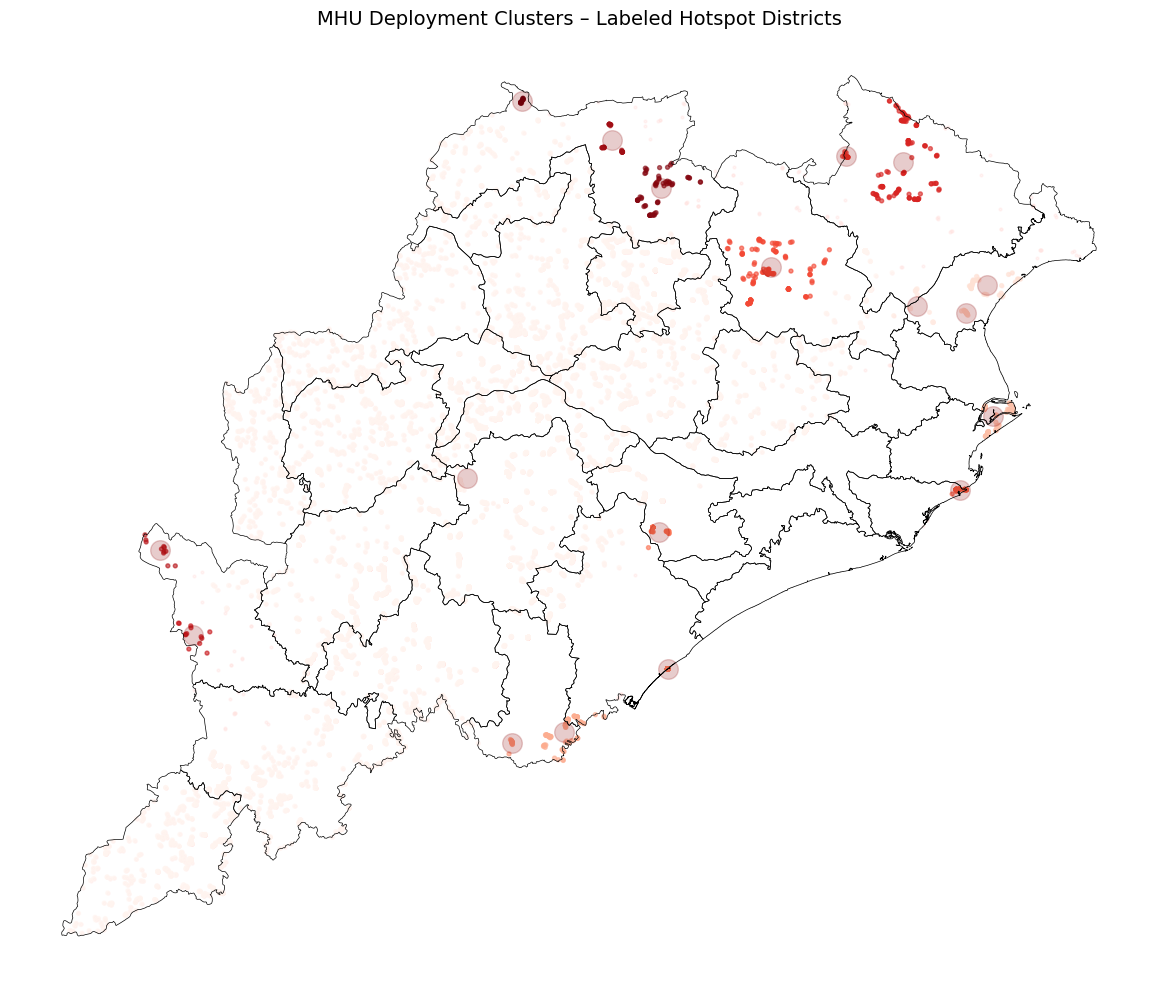

✅ Final map with labels saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\mhu_clusters_labelled_quattrosans.png


In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import Point
import matplotlib

# === 1. Set paths ===
uncovered_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.geojson"
districts_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
output_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\mhu_clusters_labelled_quattrosans.png"

# === 2. Load data ===
uncovered_gdf = gpd.read_file(uncovered_fp).to_crs(epsg=3857)
districts_gdf = gpd.read_file(districts_fp).to_crs(epsg=3857)

# === 3. Clustering uncovered points ===
coords = uncovered_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()
db = DBSCAN(eps=15000, min_samples=10).fit(coords)
uncovered_gdf['cluster'] = db.labels_
clustered_gdf = uncovered_gdf[uncovered_gdf['cluster'] != -1]
centroids = clustered_gdf.dissolve(by='cluster').centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=uncovered_gdf.crs)

# === 4. Get districts with hotspots ===
hot_districts = clustered_gdf['district'].unique()
district_labels = districts_gdf[districts_gdf['district'].isin(hot_districts)].copy()
district_labels['centroid'] = district_labels.geometry.centroid

# === 5. Set Quattro Sans if available ===
plt.rcParams['font.family'] = 'Quattro Sans' if 'Quattro Sans' in matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf') else 'DejaVu Sans'

# === 6. Plot ===
fig, ax = plt.subplots(figsize=(12, 10))

districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=4, alpha=0.4)
clustered_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=8, alpha=0.6)
centroid_gdf.plot(ax=ax, color='darkred', markersize=200, alpha=0.2)

# District labels
for _, row in district_labels.iterrows():
    x, y = row['centroid'].x, row['centroid'].y
    ax.text(x, y, row['district'], fontsize=9, ha='center', va='center', fontweight='bold', color='black')

ax.set_title("MHU Deployment Clusters – Labeled Hotspot Districts", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_fp, dpi=320)
plt.show()

print(f"✅ Final map with labels saved to: {output_fp}")

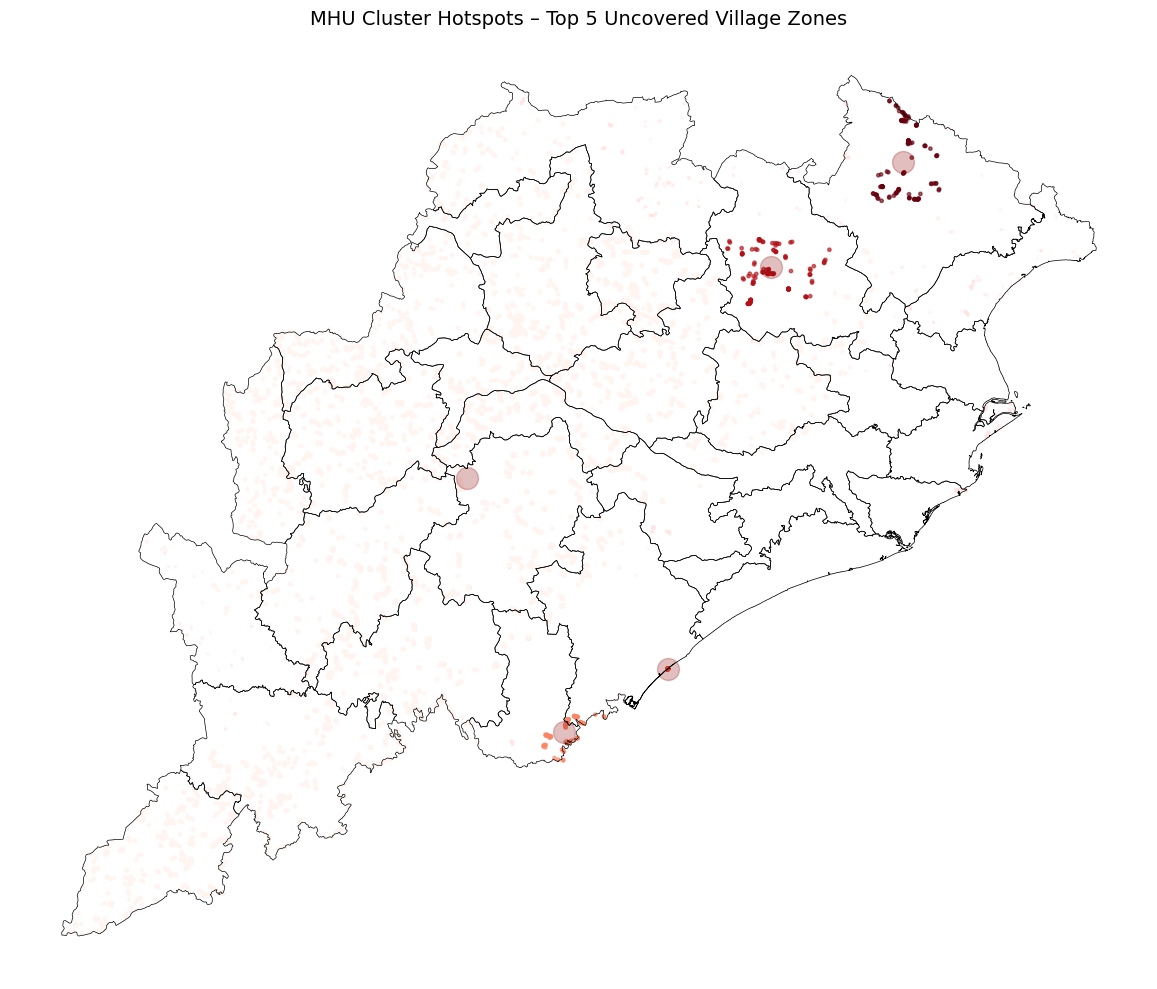

✅ Slide 5 map saved at:
C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_top5_labeled.png


In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import os

# === Paths ===
uncovered_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.geojson"
districts_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
output_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_top5_labeled.png"

# === Load data ===
uncovered_gdf = gpd.read_file(uncovered_fp).to_crs(epsg=3857)
districts_gdf = gpd.read_file(districts_fp).to_crs(epsg=3857)

# === Run clustering ===
coords = uncovered_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()
db = DBSCAN(eps=15000, min_samples=10).fit(coords)
uncovered_gdf['cluster'] = db.labels_
clustered_gdf = uncovered_gdf[uncovered_gdf['cluster'] != -1]

# === Top 5 clusters only ===
top_clusters = clustered_gdf['cluster'].value_counts().nlargest(5).index.tolist()
top_clusters_gdf = clustered_gdf[clustered_gdf['cluster'].isin(top_clusters)]
centroids = top_clusters_gdf.dissolve(by='cluster').centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=uncovered_gdf.crs)

# === Label districts with clusters ===
hot_districts = clustered_gdf['district'].unique()
district_labels = districts_gdf[districts_gdf['district'].isin(hot_districts)].copy()
district_labels['centroid'] = district_labels.geometry.centroid

# === Final Plot ===
fig, ax = plt.subplots(figsize=(12, 10))

# Plot district boundaries
districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Background: all uncovered villages (light)
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=2, alpha=0.25)

# Foreground: top 5 cluster uncovered villages
top_clusters_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=6, alpha=0.6)

# Highlight: transparent red circles for cluster hotspots
centroid_gdf.plot(ax=ax, color='darkred', markersize=250, alpha=0.25)

# Label only relevant districts
for _, row in district_labels.iterrows():
    x, y = row['centroid'].x, row['centroid'].y
    ax.text(x, y, row['district'], fontsize=9.5, ha='center', va='center',
            fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round'))

# Title and formatting
ax.set_title("MHU Cluster Hotspots – Top 5 Uncovered Village Zones", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_fp, dpi=320)
plt.show()

print(f"✅ Slide 5 map saved at:\n{output_fp}")

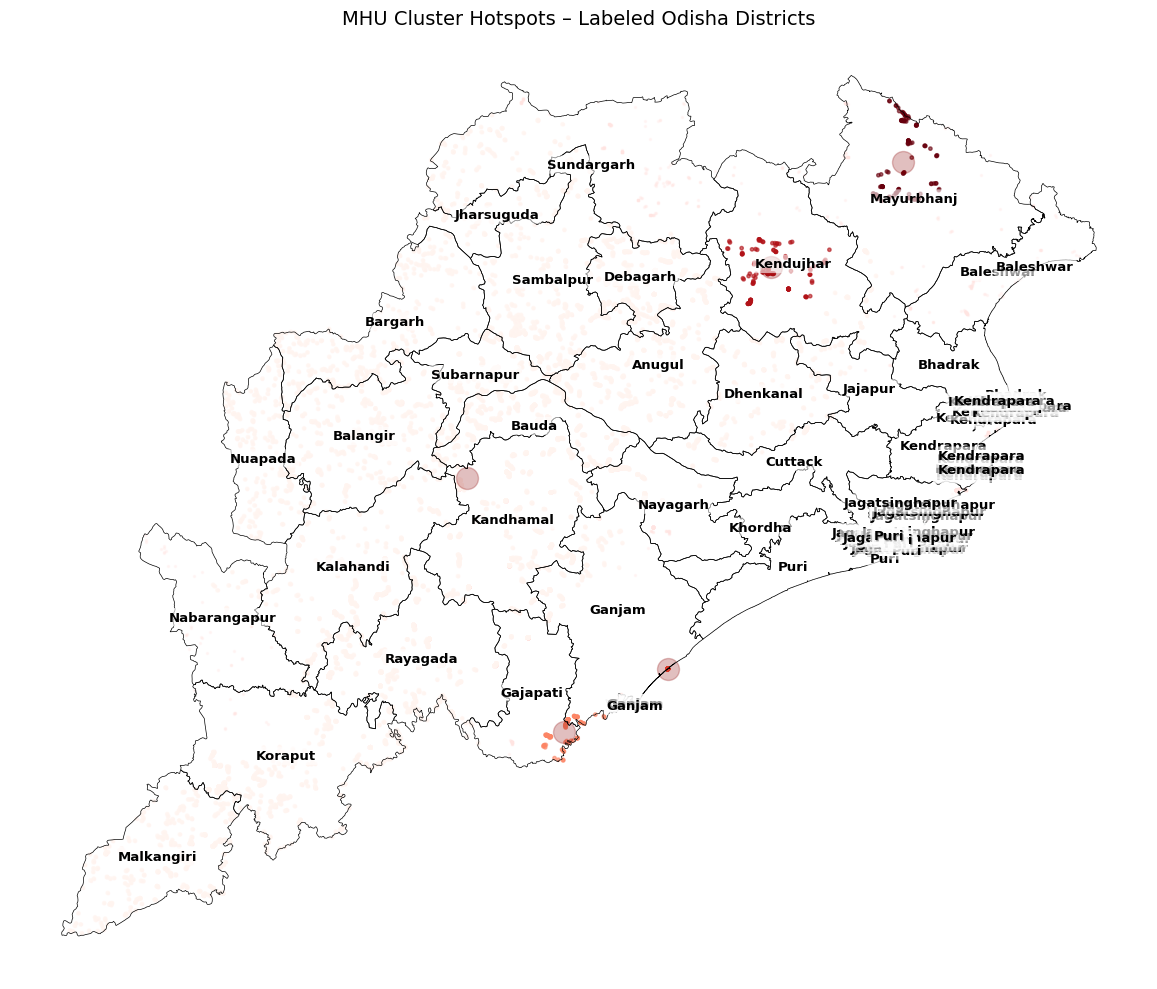

✅ Final labeled map saved at:
C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_labeled_all_districts.png


In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import os

# === File Paths ===
uncovered_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.geojson"
districts_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
output_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_labeled_all_districts.png"

# === Load GeoDataFrames ===
uncovered_gdf = gpd.read_file(uncovered_fp).to_crs(epsg=3857)
districts_gdf = gpd.read_file(districts_fp).to_crs(epsg=3857)

# === Run DBSCAN Clustering ===
coords = uncovered_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()
db = DBSCAN(eps=15000, min_samples=10).fit(coords)
uncovered_gdf['cluster'] = db.labels_
clustered_gdf = uncovered_gdf[uncovered_gdf['cluster'] != -1]

# === Top 5 Clusters ===
top_clusters = clustered_gdf['cluster'].value_counts().nlargest(5).index.tolist()
top_clusters_gdf = clustered_gdf[clustered_gdf['cluster'].isin(top_clusters)]
centroids = top_clusters_gdf.dissolve(by='cluster').centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=uncovered_gdf.crs)

# === Add District Centroids for Labeling ===
districts_gdf['centroid'] = districts_gdf.geometry.centroid

# === Final Plot ===
fig, ax = plt.subplots(figsize=(12, 10))

# Plot district outlines
districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Background: all uncovered
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=2, alpha=0.25)

# Foreground: top 5 cluster uncovered villages
top_clusters_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=6, alpha=0.6)

# Cluster hotspot zones
centroid_gdf.plot(ax=ax, color='darkred', markersize=250, alpha=0.25)

# Add ALL district names at centroids
for _, row in districts_gdf.iterrows():
    x, y = row['centroid'].x, row['centroid'].y
    ax.text(
        x, y, row['district'], fontsize=9.5, ha='center', va='center',
        fontweight='bold', color='black',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Format
ax.set_title("MHU Cluster Hotspots – Labeled Odisha Districts", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_fp, dpi=320)
plt.show()

print(f"✅ Final labeled map saved at:\n{output_fp}")

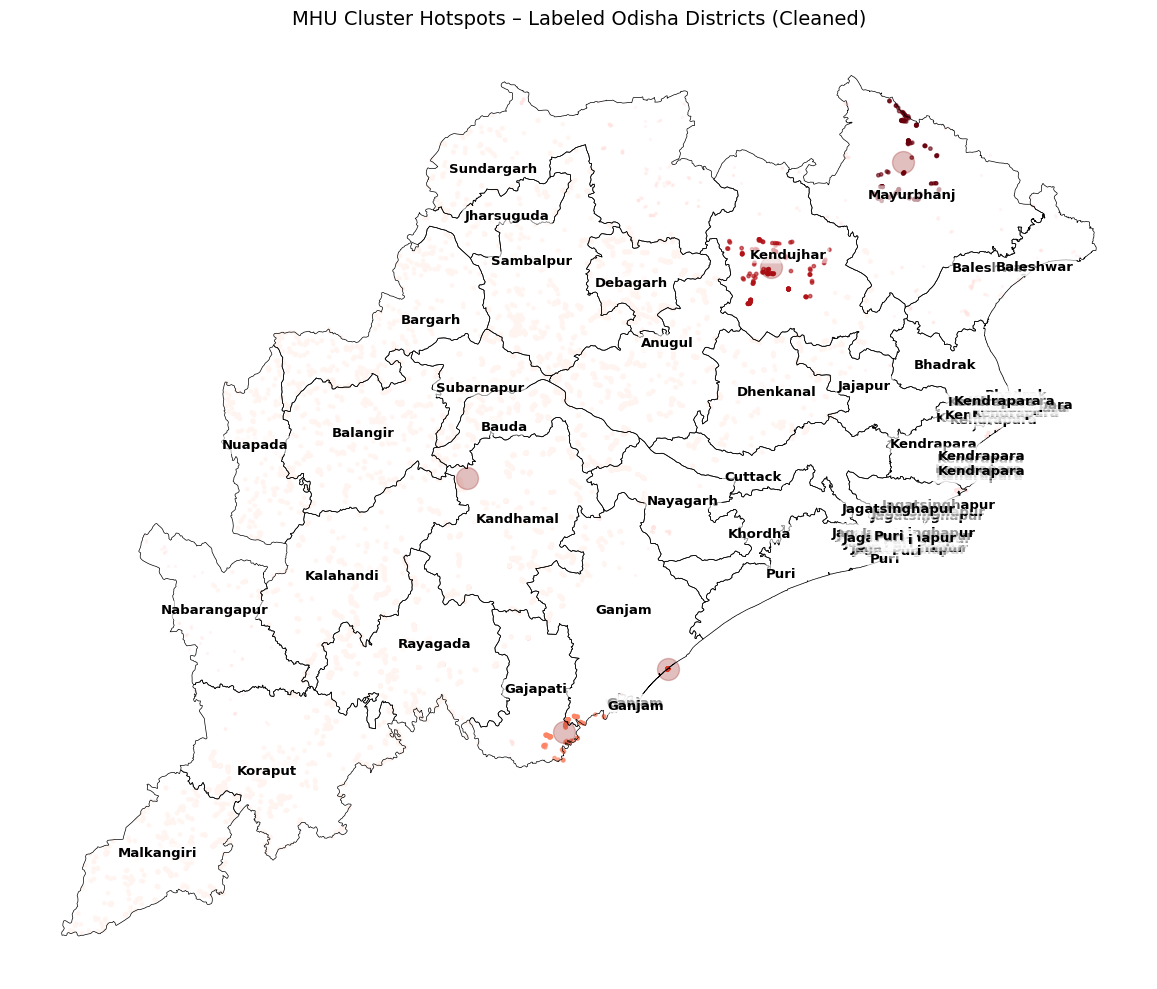

✅ Clean district-label map saved at:
C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_labeled_representative.png


In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import os

# === File Paths ===
uncovered_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.geojson"
districts_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
output_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\slide5_mhu_clusters_labeled_representative.png"

# === Load Data ===
uncovered_gdf = gpd.read_file(uncovered_fp).to_crs(epsg=3857)
districts_gdf = gpd.read_file(districts_fp).to_crs(epsg=3857)

# === DBSCAN Clustering ===
coords = uncovered_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()
db = DBSCAN(eps=15000, min_samples=10).fit(coords)
uncovered_gdf['cluster'] = db.labels_
clustered_gdf = uncovered_gdf[uncovered_gdf['cluster'] != -1]

# === Top 5 Clusters and Centroids ===
top_clusters = clustered_gdf['cluster'].value_counts().nlargest(5).index.tolist()
top_clusters_gdf = clustered_gdf[clustered_gdf['cluster'].isin(top_clusters)]
centroids = top_clusters_gdf.dissolve(by='cluster').centroid
centroid_gdf = gpd.GeoDataFrame(geometry=centroids, crs=uncovered_gdf.crs)

# === Label Points: use representative_point() to ensure inside polygon ===
districts_gdf['label_point'] = districts_gdf.geometry.representative_point()

# === Plot Map ===
fig, ax = plt.subplots(figsize=(12, 10))

# District outlines
districts_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Background: all uncovered
uncovered_gdf.plot(ax=ax, color='mistyrose', markersize=2, alpha=0.25)

# Foreground: top 5 clusters
top_clusters_gdf.plot(ax=ax, column='cluster', cmap='Reds', markersize=6, alpha=0.6)

# Transparent circle clusters
centroid_gdf.plot(ax=ax, color='darkred', markersize=250, alpha=0.25)

# Label each district inside its shape
for _, row in districts_gdf.iterrows():
    x, y = row['label_point'].x, row['label_point'].y
    ax.text(
        x, y, row['district'], fontsize=9.5, ha='center', va='center',
        fontweight='bold', color='black',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Title
ax.set_title("MHU Cluster Hotspots – Labeled Odisha Districts (Cleaned)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_fp, dpi=320)
plt.show()

print(f"✅ Clean district-label map saved at:\n{output_fp}")

In [21]:
import pandas as pd

# === File path ===
file_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.csv"

# === Load uncovered villages CSV ===
df = pd.read_csv(file_path)

# === Check column names to ensure correct grouping ===
print("📋 Columns:", df.columns.tolist())

# === Group by district and count uncovered villages ===
top5_uncovered = df['district'].value_counts().nlargest(5).reset_index()
top5_uncovered.columns = ['district', 'uncovered_villages']

# === Display results ===
print("🏆 Top 5 Districts with Most Uncovered Villages:")
print(top5_uncovered)

# === Optional: Save to CSV for visualization or slide table ===
output_path = file_path.replace("villages_uncovered.csv", "top5_uncovered_districts.csv")
top5_uncovered.to_csv(output_path, index=False)
print(f"✅ Top 5 summary saved to: {output_path}")

📋 Columns: ['village_id', 'district', 'tru_2011', 'nearest_facility_dist_m', 'combined_coverage_status', 'geometry']
🏆 Top 5 Districts with Most Uncovered Villages:
    district  uncovered_villages
0  kandhamal                 640
1   rayagada                 576
2  kalahandi                 531
3    koraput                 480
4     anugul                 416
✅ Top 5 summary saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\top5_uncovered_districts.csv


✅ Top 5 uncovered districts: ['kandhamal', 'rayagada', 'kalahandi', 'koraput', 'anugul']


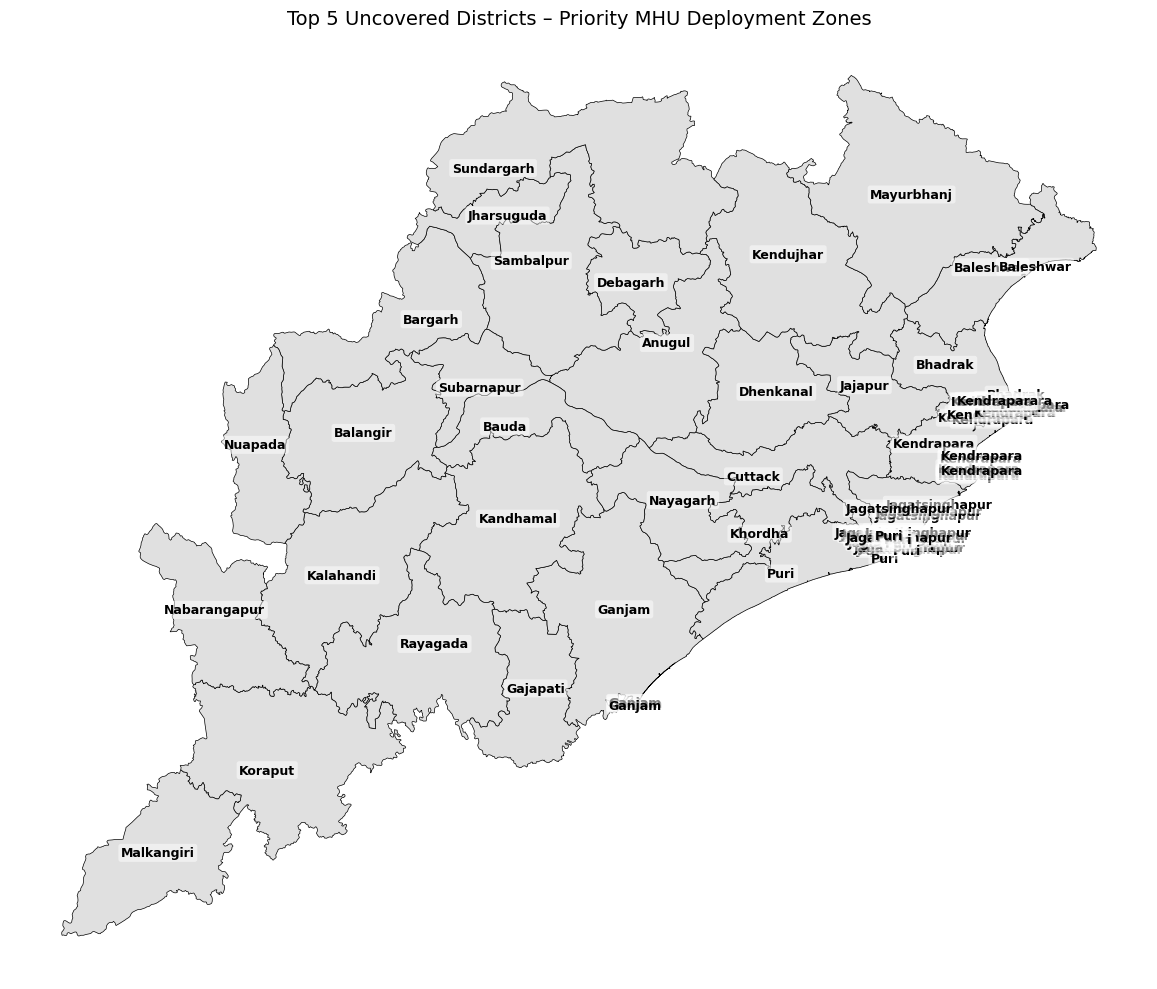

✅ Map with shaded top 5 districts saved at:
C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\top5_districts_hotspot_map.png


In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === File Paths ===
districts_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
uncovered_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split_coverage\villages_uncovered.csv"
output_fp = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\visualizations\top5_districts_hotspot_map.png"

# === Load GeoData and Uncovered Data ===
districts_gdf = gpd.read_file(districts_fp).to_crs(epsg=3857)
uncovered_df = pd.read_csv(uncovered_fp)

# === Calculate top 5 districts with highest uncovered counts ===
top5_districts = uncovered_df['district'].value_counts().nlargest(5).index.tolist()
print("✅ Top 5 uncovered districts:", top5_districts)

# === Add a column to style the map ===
districts_gdf['hotspot'] = districts_gdf['district'].apply(lambda x: 'Top 5' if x in top5_districts else 'Other')

# === Plot Map ===
fig, ax = plt.subplots(figsize=(12, 10))

# Color scheme
color_map = {'Top 5': '#a83232', 'Other': '#e0e0e0'}

# Plot districts with conditional color
districts_gdf.plot(ax=ax, color=districts_gdf['hotspot'].map(color_map), edgecolor='black', linewidth=0.5)

# Label districts
for _, row in districts_gdf.iterrows():
    label_point = row['geometry'].representative_point()
    ax.text(
        label_point.x, label_point.y, row['district'],
        fontsize=9, ha='center', va='center',
        fontweight='bold', color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Format
ax.set_title("Top 5 Uncovered Districts – Priority MHU Deployment Zones", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig(output_fp, dpi=320)
plt.show()

print(f"✅ Map with shaded top 5 districts saved at:\n{output_fp}")

In [24]:
import pandas as pd

# === File path ===
file_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_3km_coverage\combined_phc_hsc_coverage_3km_with_name_subdistrict.csv"

# === Load dataset ===
df = pd.read_csv(file_path)

# === Normalize coverage column ===
df['combined_coverage_status'] = df['combined_coverage_status'].str.strip().str.lower()

# === Step 1: Count covered/uncovered by district ===
coverage_summary = df.groupby('district')['combined_coverage_status'].value_counts().unstack(fill_value=0).reset_index()
coverage_summary.columns.name = None

# === Step 2: Calculate total and percentage uncovered ===
coverage_summary['total_villages'] = coverage_summary['covered'] + coverage_summary['uncovered']
coverage_summary['uncovered_pct'] = (coverage_summary['uncovered'] / coverage_summary['total_villages']) * 100

# === ✅ Requirement 1: Districts with >300 uncovered villages ===
high_uncovered = coverage_summary[coverage_summary['uncovered'] > 300].sort_values(by='uncovered', ascending=False)
print("🏆 Districts with >300 uncovered villages:")
print(high_uncovered[['district', 'uncovered']])
print(f"📌 Count: {len(high_uncovered)}")

# === ✅ Requirement 2: Bin districts by % uncovered ===
def pct_category(pct):
    if pct <= 10:
        return '0–10%'
    elif pct <= 20:
        return '10–20%'
    elif pct <= 30:
        return '20–30%'
    else:
        return '>30%'

coverage_summary['uncovered_pct_group'] = coverage_summary['uncovered_pct'].apply(pct_category)

group_counts = coverage_summary.groupby('uncovered_pct_group')['district'].count().reset_index()
print("\n📊 Districts by % uncovered category:")
print(group_counts)

#import os

# === Output directory path ===
output_dir = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\tables_for_slides"

# ✅ Create folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# ✅ Save output files
high_uncovered.to_csv(f"{output_dir}\\districts_uncovered_above_300.csv", index=False)
coverage_summary.to_csv(f"{output_dir}\\districts_by_uncovered_percentage.csv", index=False)

print(f"📁 Saved summary tables in:\n{output_dir}")

🏆 Districts with >300 uncovered villages:
      district  uncovered
15   kandhamal        640
26    rayagada        576
14   kalahandi        531
19     koraput        480
0       anugul        416
9     gajapati        405
27   sambalpur        395
7      deogarh        360
10      ganjam        356
5        boudh        353
1     balangir        340
20  malkangiri        337
📌 Count: 12

📊 Districts by % uncovered category:
  uncovered_pct_group  district
0               0–10%         9
1              10–20%         7
2              20–30%        12
3                >30%         2
📁 Saved summary tables in:
C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\tables_for_slides


In [1]:
import pandas as pd

# 📂 File path
file_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.csv"

# 📥 Load data
df = pd.read_csv(file_path)

# ✅ Check coverage counts
coverage_counts = df['combined_coverage_status'].value_counts()
total_villages = coverage_counts.sum()
covered = coverage_counts.get('Covered', 0)
uncovered = coverage_counts.get('Uncovered', 0)
uncovered_pct = round((uncovered / total_villages) * 100, 2)

# 📊 Display summary
print("📄 Unified HSC/PHC 3km Coverage Summary")
print(f"✅ Total villages: {total_villages}")
print(f"✅ Covered villages: {covered}")
print(f"❌ Uncovered villages: {uncovered}")
print(f"📉 Uncovered percentage: {uncovered_pct}%")

📄 Unified HSC/PHC 3km Coverage Summary
✅ Total villages: 51404
✅ Covered villages: 48439
❌ Uncovered villages: 2965
📉 Uncovered percentage: 5.77%


In [2]:
import pandas as pd
import os

# 📂 Define paths
base_dir = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset"
flourish_dir = os.path.join(base_dir, "flourish")
os.makedirs(flourish_dir, exist_ok=True)

# 📥 Load combined coverage file
file_path = os.path.join(base_dir, "combined_phc_hsc_coverage_3km.csv")
df = pd.read_csv(file_path)

# 📊 Generate coverage summary table
coverage_summary = df['combined_coverage_status'].value_counts().reset_index()
coverage_summary.columns = ['Status', 'Villages']

# 💾 Save to CSV in 'flourish' folder
output_path = os.path.join(flourish_dir, "coverage_summary_table.csv")
coverage_summary.to_csv(output_path, index=False)

# ✅ Confirm
print(f"✅ Saved: {output_path}")

✅ Saved: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish\coverage_summary_table.csv


In [3]:
import pandas as pd
import os

# 📂 Input file path
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.csv"

# 📂 Output folder
output_folder = os.path.join(os.path.dirname(input_path), "flourish")
os.makedirs(output_folder, exist_ok=True)

# 📥 Load the data
df = pd.read_csv(input_path)

# 🧮 Group by district
summary = df.groupby("district_x").agg(
    Total_Villages=('village_id', 'count'),
    Uncovered_Villages=('combined_coverage_status', lambda x: (x == 'Uncovered').sum())
).reset_index()

# ➗ Calculate uncovered %
summary["Uncovered_Percentage"] = round(
    summary["Uncovered_Villages"] / summary["Total_Villages"] * 100, 2
)

# ✅ Save table to flourish folder
output_path = os.path.join(output_folder, "district_uncovered_summary.csv")
summary.to_csv(output_path, index=False)
print("✅ Saved:", output_path)

# 🖨️ Print preview
print(summary.head())

✅ Saved: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish\district_uncovered_summary.csv
  district_x  Total_Villages  Uncovered_Villages  Uncovered_Percentage
0     anugul            1888                  44                  2.33
1   balangir            1791                  16                  0.89
2  baleshwar            2935                   4                  0.14
3    bargarh            1214                  12                  0.99
4    bhadrak            1317                   0                  0.00


In [4]:
import pandas as pd
import os

# 📂 Input file path
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.csv"

# 📂 Output folder
output_folder = os.path.join(os.path.dirname(input_path), "flourish")
os.makedirs(output_folder, exist_ok=True)

# 📥 Load dataset
df = pd.read_csv(input_path)

# 🧮 Group and calculate uncovered % per district
summary = df.groupby("district_x").agg(
    Total_Villages=('village_id', 'count'),
    Uncovered_Villages=('combined_coverage_status', lambda x: (x == 'Uncovered').sum())
).reset_index()

summary["Uncovered_Percentage"] = round(
    summary["Uncovered_Villages"] / summary["Total_Villages"] * 100, 2
)

# 🪜 Sort by % uncovered (descending)
summary = summary.sort_values(by="Uncovered_Percentage", ascending=False).reset_index(drop=True)

# 💾 Save to CSV
output_path = os.path.join(output_folder, "district_uncovered_percentage_ranked.csv")
summary.to_csv(output_path, index=False)
print("✅ Saved ranked district table at:", output_path)

# 🖨️ Preview top 10
print(summary.head(10))

✅ Saved ranked district table at: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish\district_uncovered_percentage_ranked.csv
   district_x  Total_Villages  Uncovered_Villages  Uncovered_Percentage
0     khordha            1547                 728                 47.06
1  kendrapara            1548                 505                 32.62
2        puri            1711                 227                 13.27
3     jajapur            1791                 230                 12.84
4    gajapati            1617                 186                 11.50
5     deogarh             879                  84                  9.56
6     cuttack            1959                 111                  5.67
7   sambalpur            1317                  73                  5.54
8    nayagarh            1701                  82                  4.82
9    rayagada            2672                 127                  4.7

In [5]:
import pandas as pd
import os

# 📂 File path
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.csv"
output_folder = os.path.join(os.path.dirname(input_path), "flourish")
os.makedirs(output_folder, exist_ok=True)

# 📥 Load data
df = pd.read_csv(input_path)

# 🧮 Compute uncovered counts and total villages per district
summary = df.groupby("district_x").agg(
    Total_villages=('village_id', 'count'),
    Uncovered_villages=('combined_coverage_status', lambda x: (x == 'Uncovered').sum())
).reset_index().rename(columns={"district_x": "District"})

# ➗ Compute uncovered percentage
summary["bubble_size"] = round(summary["Uncovered_villages"] / summary["Total_villages"] * 100, 2)

# 🎨 Assign color categories based on thresholds
def assign_color(pct):
    if pct >= 30:
        return "darkred"
    elif pct >= 20:
        return "orangered"
    elif pct >= 10:
        return "orange"
    elif pct >= 5:
        return "gold"
    else:
        return "green"

summary["color"] = summary["bubble_size"].apply(assign_color)

# ✅ Reorder columns
summary = summary[["District", "Uncovered_villages", "Total_villages", "bubble_size", "color"]]
summary = summary.sort_values(by="bubble_size", ascending=False).reset_index(drop=True)

# 💾 Save to CSV
output_path = os.path.join(output_folder, "district_bubble_chart_table.csv")
summary.to_csv(output_path, index=False)
print(f"✅ Bubble chart table saved to: {output_path}")

# 🖨️ Preview top 5
print(summary.head())

✅ Bubble chart table saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\flourish\district_bubble_chart_table.csv
     District  Uncovered_villages  Total_villages  bubble_size    color
0     khordha                 728            1547        47.06  darkred
1  kendrapara                 505            1548        32.62  darkred
2        puri                 227            1711        13.27   orange
3     jajapur                 230            1791        12.84   orange
4    gajapati                 186            1617        11.50   orange


In [6]:
import pandas as pd
import os

# 📂 Input file path
input_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.csv"

# 📂 Create output folder 'split'
base_dir = os.path.dirname(input_path)
output_dir = os.path.join(base_dir, "split")
os.makedirs(output_dir, exist_ok=True)

# 📥 Load the main file
df = pd.read_csv(input_path)

# ✅ Filter into covered and uncovered
covered_df = df[df["combined_coverage_status"].str.lower() == "covered"]
uncovered_df = df[df["combined_coverage_status"].str.lower() == "uncovered"]

# 💾 Save to new CSV files
covered_path = os.path.join(output_dir, "covered_villages.csv")
uncovered_path = os.path.join(output_dir, "uncovered_villages.csv")

covered_df.to_csv(covered_path, index=False)
uncovered_df.to_csv(uncovered_path, index=False)

print(f"✅ Covered villages saved to: {covered_path}")
print(f"❌ Uncovered villages saved to: {uncovered_path}")

✅ Covered villages saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split\covered_villages.csv
❌ Uncovered villages saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\split\uncovered_villages.csv


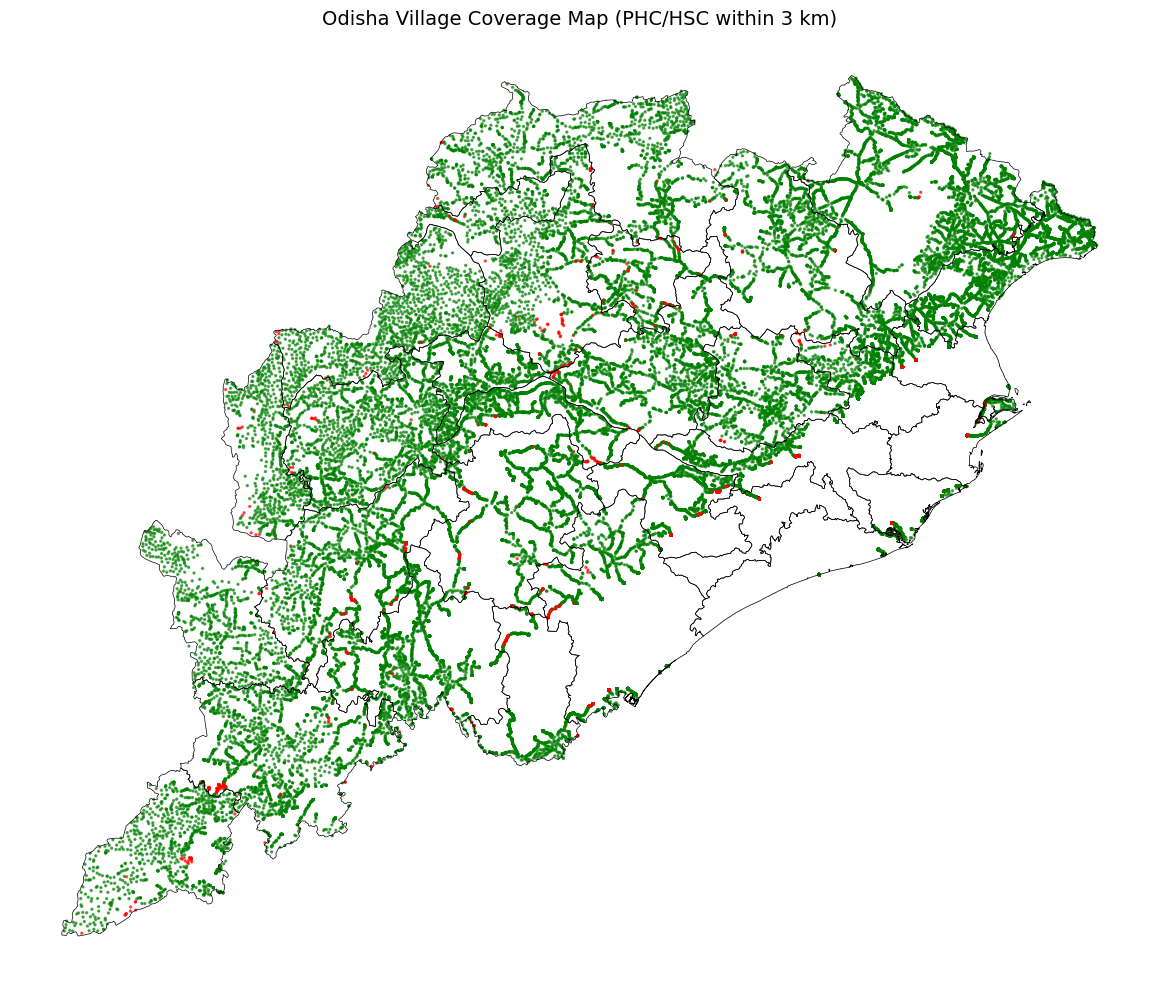

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 📂 File paths (already in GeoJSON)
districts_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
villages_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.geojson"

# ✅ Load GeoJSON files
districts = gpd.read_file(districts_path)
villages = gpd.read_file(villages_path)

# ✅ Assign color based on coverage status
color_map = {"Covered": "green", "Uncovered": "red"}
villages["color"] = villages["combined_coverage_status"].map(color_map)

# ✅ Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
districts.boundary.plot(ax=ax, color='black', linewidth=0.5)
villages.plot(ax=ax, color=villages["color"], markersize=2, alpha=0.6)

plt.title("Odisha Village Coverage Map (PHC/HSC within 3 km)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

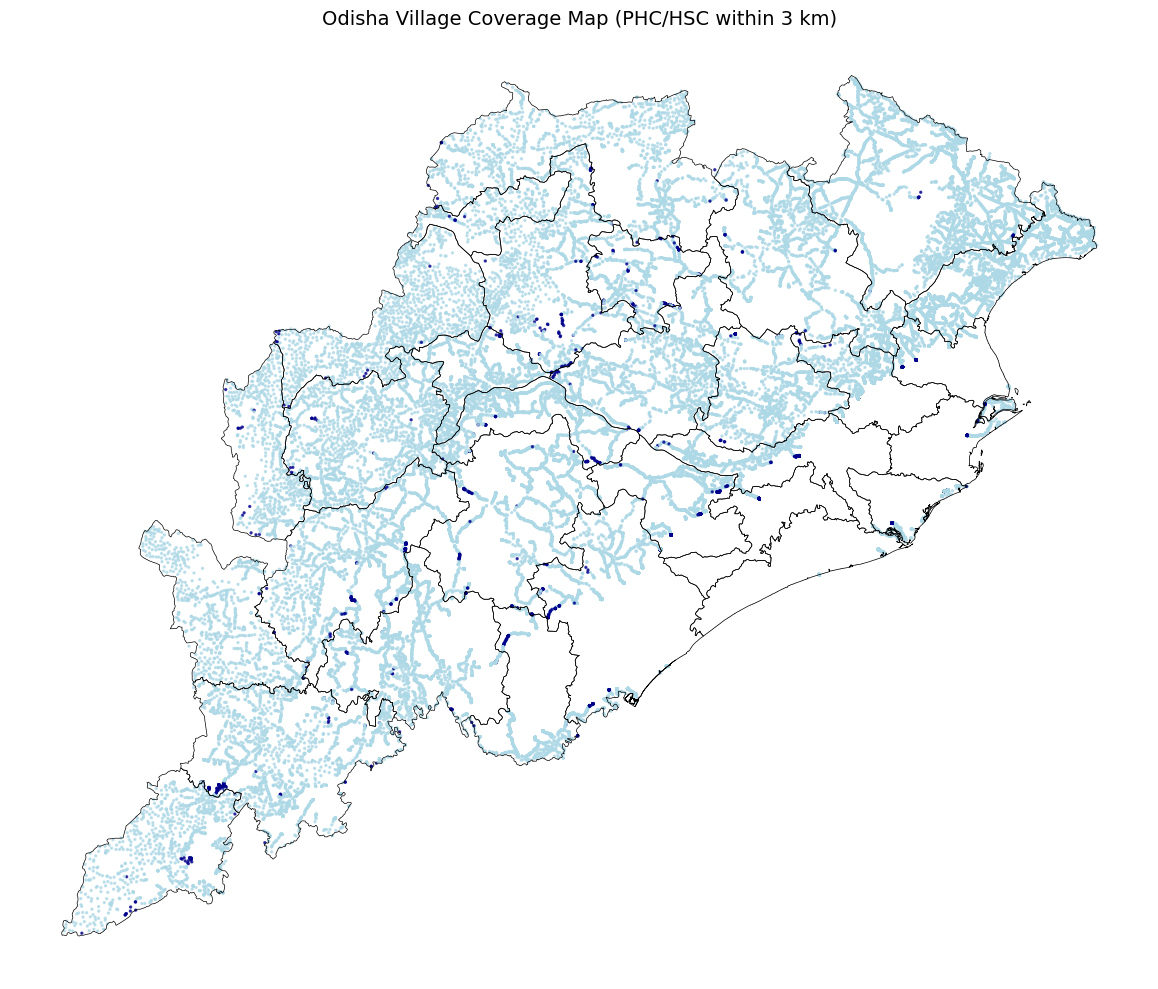

✅ Map saved to: C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\odisha_village_coverage_blue_map.png


: 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# 📂 File paths
districts_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\shapefile\odisha_districts_final.geojson"
villages_path = r"C:\Users\utkar\OneDrive\Desktop\ClimateXTelemedicine Odisha\Odisha_VScode\.venv\Policy note\Output_presentation\final_dataset\combined_phc_hsc_coverage_3km.geojson"

# ✅ Load GeoJSON files
districts = gpd.read_file(districts_path)
villages = gpd.read_file(villages_path)

# ✅ Assign updated color scheme
color_map = {"Covered": "#ADD8E6", "Uncovered": "#00008B"}  # Light blue, Dark blue
villages["color"] = villages["combined_coverage_status"].map(color_map)

# ✅ Plot
fig, ax = plt.subplots(figsize=(12, 10))
districts.boundary.plot(ax=ax, color='black', linewidth=0.5)
villages.plot(ax=ax, color=villages["color"], markersize=2, alpha=0.7)

plt.title("Odisha Village Coverage Map (PHC/HSC within 3 km)", fontsize=14)
ax.axis("off")
plt.tight_layout()

# 💾 Save output in same directory
output_path = os.path.join(os.path.dirname(villages_path), "odisha_village_coverage_blue_map.png")
plt.savefig(output_path, dpi=300)
plt.show()

print(f"✅ Map saved to: {output_path}")